Regresión Lineal: Coste de un incidente de seguridad

En este ejercicio se explican los fundamentos básicos de la regresión lineal aplicada a un caso de uso sencillo relacionado con la Ciberseguridad.

Ejercicio

El ejercicio consiste en predecir el coste de un incidente de seguridad en base al número de equipos que se han visto afectados. El conjunto de datos es generado de manera aleatoria.

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

X = 2 * np.random.rand(100, 1) # 100 valores, 1 dimensiones
y = 4 + 3 * X + np.random.rand(100, 1)

print('La longitud del conjunto de datos es:', len(X))

La longitud del conjunto de datos es: 100


Visualización del conjunto de datos

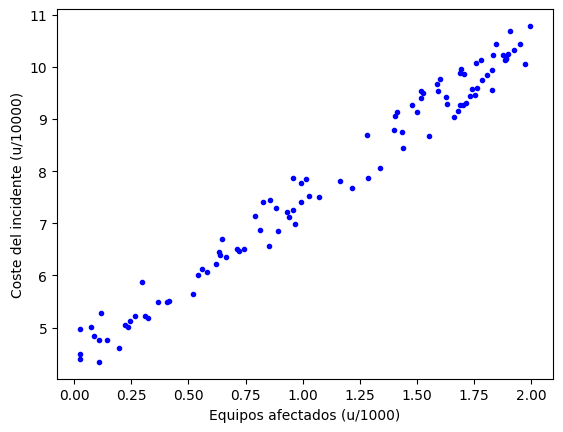

In [72]:
%matplotlib inline
plt.plot(X, y, 'b.')
plt.xlabel('Equipos afectados (u/1000)')
plt.ylabel('Coste del incidente (u/10000)')
plt.show()

Modificación del conjunto de datos

In [73]:
data = {'n_equipos_afectados': X.flatten(), 'coste': y.flatten()} # flatten convertir un arreglo multidimensional en un vector unidimensional (una sola fila de datos).
df = pd.DataFrame(data)
df.head(10)

,n_equipos_afectados,coste
0,1.288456,7.874830
1,1.517702,9.532609
2,1.734333,9.435843
3,1.834701,10.231472
4,0.621763,6.228323
5,1.787645,9.750706
6,0.298500,5.880842
7,0.858250,7.454405
8,0.118849,5.280791
9,1.974664,10.053209


In [74]:
# Escalando el número de equpos afectados
df['n_equipos_afectados'] = df['n_equipos_afectados'] * 1000
df['n_equipos_afectados'] = df['n_equipos_afectados'].astype('int')

# Escalando el coste
df['coste'] = df['coste'] * 10000
df['coste'] = df['coste'].astype('int')

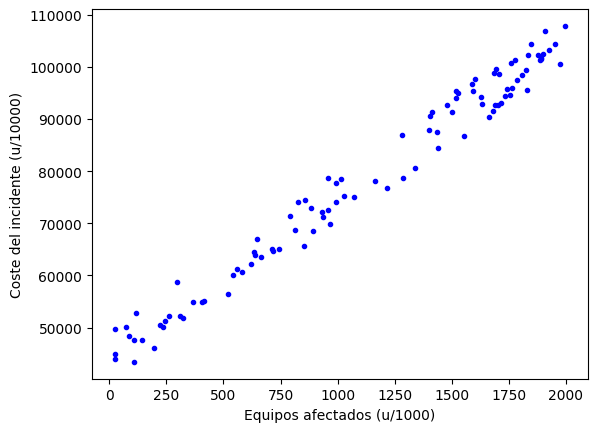

In [75]:
plt.plot(df['n_equipos_afectados'], df['coste'], 'b.')
plt.xlabel('Equipos afectados (u/1000)')
plt.ylabel('Coste del incidente (u/10000)')
plt.show()

Construcción del modelo

In [76]:
# Construcción del modelo y ajuste de la función hipótesis
lin_reg = LinearRegression()
lin_reg.fit(df['n_equipos_afectados'].values.reshape(-1, 1), df['coste'])


LinearRegression()

In [77]:
# accediendo al parámetro theta 0 después del cálculo
lin_reg.intercept_

np.float64(44222.06078368317)

In [78]:
# accediendo al parámetro theta 1 después del cálculo
lin_reg.coef_

array([30.55778309])

In [79]:
# Predicción para el valor mínimo y máximo del conjunto de datos de entrenamiento
X_min_max = np.array([[df["n_equipos_afectados"].min()], [df["n_equipos_afectados"].max()]])
y_train_pred = lin_reg.predict(X_min_max)

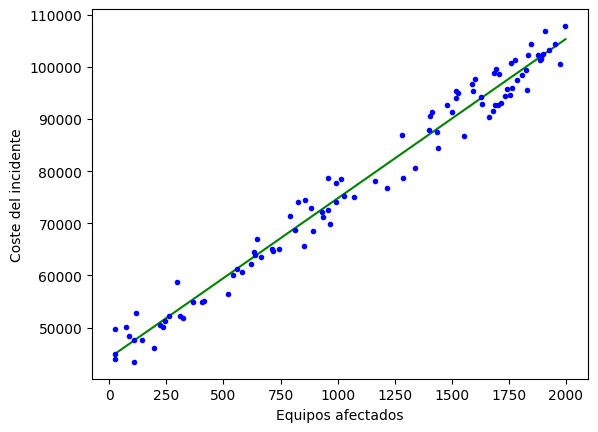

In [80]:
# Representación gráfica de la función hipótesis generada
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()

Predicción de nuevos ejemplos

In [81]:
x_new = np.array([[1300]]) # 1300 equipos afectados

# Predicción del coste que tendría el incidente
coste = lin_reg.predict(x_new) 

print("El coste del incidente sería:", int(coste[0]), "€")

El coste del incidente sería: 83947 €


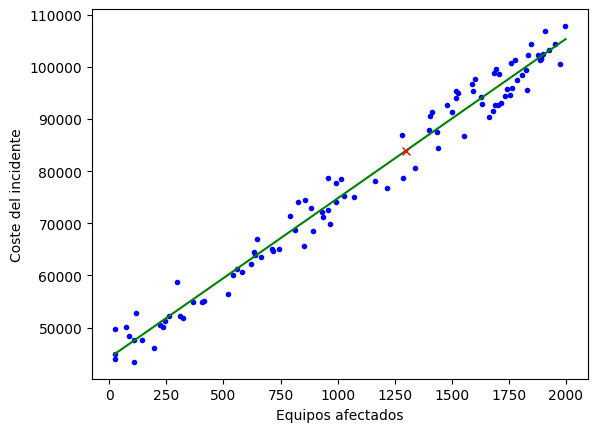

In [ ]:
plt.plot(df['n_equipos_afectados'], df['coste'], "b.")
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(x_new, coste, "rx")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste del incidente")
plt.show()